In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# checkpoint_name = "finetuning_0.1_0.1"
# checkpoint_name = "default"
# checkpoint_name = "memory"
# checkpoint_name = "SAM"
checkpoint_name = "memory_v3_custom_complex_CLEVR"
other_checkpoint_name = "memory_v2_custom_complex_CLEVR"
sim_type = "jac_"   # "jac_" or ""
sim_title = "Jaccard" if sim_type == "jac_" else "Cosine"

## Plot sim between consecutive images

In [35]:
# sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/similarities_10000-10099.pkl"
# sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/{sim_type}similarities_10000-10029.pkl"
sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/{sim_type}similarities_0-7.pkl"
other_sim_path = f"/app/ncb/encoding_comparison_scripts/results/{other_checkpoint_name}/{sim_type}similarities_0-7.pkl"

with open(sim_path, "rb") as f:
    sims = pickle.load(f)

with open(other_sim_path, "rb") as f:
    other_sims = pickle.load(f)

if "v3" in checkpoint_name:
    reset_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/reset_memory_bank_0-7.pkl"
    with open(reset_path, "rb") as f:
        resets = pickle.load(f)

In [36]:
# cosine sim between consecutive images
consec_frame_sims = [list() for _ in range(128)]
for video_id in sorted(sims.keys()):
    for frame_id in sorted(sims[video_id].keys()):
        consec_frame_sims[int(frame_id)].append(sims[video_id][frame_id])

other_consec_frame_sims = [list() for _ in range(128)]
for video_id in sorted(other_sims.keys()):
    for frame_id in sorted(other_sims[video_id].keys()):
        other_consec_frame_sims[int(frame_id)].append(other_sims[video_id][frame_id])

if "v3" in checkpoint_name:
    memory_resets = [list() for _ in range(128)]
    for video_id in sorted(resets.keys()):
        for frame_id in sorted(resets[video_id].keys()):
            memory_resets[int(frame_id)].append(int(resets[video_id][frame_id]))

valid_indices = [i for i in range(len(consec_frame_sims)) if len(consec_frame_sims[i]) > 0]

consec_sim_means = np.array([np.mean(consec_frame_sims[i]) for i in valid_indices])
consec_sim_std = np.array([np.std(consec_frame_sims[i]) for i in valid_indices])
other_consec_sim_means = np.array([np.mean(other_consec_frame_sims[i]) for i in valid_indices])
other_consec_sim_std = np.array([np.std(other_consec_frame_sims[i]) for i in valid_indices])

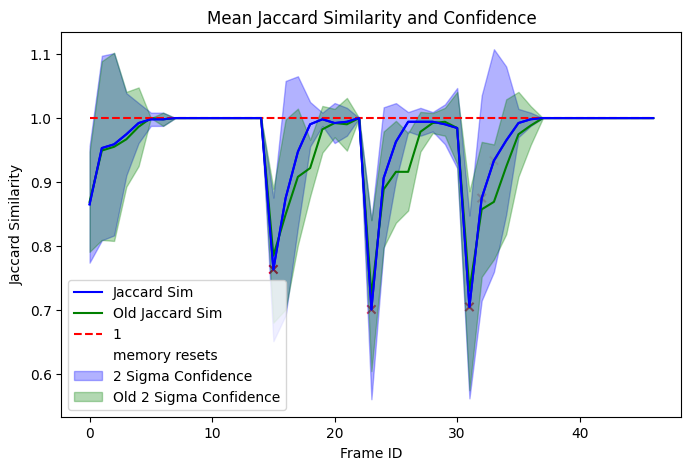

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(valid_indices, consec_sim_means, color='b', label=f"{sim_title} Sim")
plt.plot(valid_indices, other_consec_sim_means, color='g', label=f"Old {sim_title} Sim")
plt.plot(valid_indices, np.ones_like(consec_sim_means), color="r", linestyle="--", label="1")

if "v3" in checkpoint_name:
    plt.plot(valid_indices, consec_sim_means, color='b')
    reset_mmb = np.array([np.mean(memory_resets[i]) for i in valid_indices])
    plt.scatter(np.array(valid_indices), consec_sim_means, color="red", marker="x", alpha=reset_mmb[1:], label="memory resets")
    
plt.fill_between(valid_indices, consec_sim_means + 2 * consec_sim_std, consec_sim_means - 2 * consec_sim_std, color="b", alpha=0.3, label="2 Sigma Confidence")
plt.fill_between(valid_indices, other_consec_sim_means + 2 * other_consec_sim_std, other_consec_sim_means - 2 * other_consec_sim_std, color="g", alpha=0.3, label="Old 2 Sigma Confidence")

plt.xlabel("Frame ID")
plt.ylabel(f"{sim_title} Similarity")
plt.legend(loc="best")
plt.title(f"Mean {sim_title} Similarity and Confidence")
plt.show()

In [39]:
# mean cosine sim of all image pairs
print(np.mean(consec_sim_means))
print(np.mean(consec_sim_std))

0.9637632978723404
0.0221885640113039


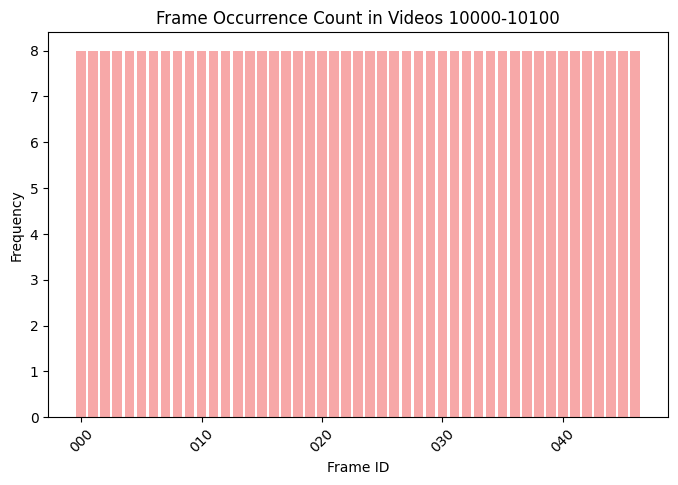

: 

In [ ]:
all_frames = [frame for frames in sims.values() for frame in frames]

# Step 2: Count occurrences of each frame
frame_counts = Counter(all_frames)

# Step 3: Sort frames
sorted_frames = sorted(frame_counts.keys())  # Sort frame IDs alphabetically/numerically
sorted_counts = [frame_counts[frame] for frame in sorted_frames]  # Adjust values accordingly

# Step 4: Plot bar chart
plt.figure(figsize=(8, 5))
# plt.bar(sorted_frames, sorted_counts, color='#F7A8A8')
plt.bar(sorted_frames, sorted_counts, color='#F7A8A8')

plt.xlabel("Frame ID")
plt.ylabel("Frequency")
plt.title("Frame Occurrence Count in Videos 10000-10100")
n = 10  # Adjust this number to control density
plt.xticks(ticks=np.arange(0, len(sorted_frames), n), labels=sorted_frames[::n], rotation=45)
plt.show()

In [ ]:
# number of image pairs we got a similarity for
np.sum(sorted_counts)

376

: 

## Plot sim between consecutive images for single videos

In [ ]:
video_id = "008"
# checkpoint_name = "memory_v2_custom"
# checkpoint_name = "default_custom"
# checkpoint_name = "finetuned_default_custom"
# checkpoint_name = "finetuned_memory_v2_custom"
checkpoint_name = "memory_v3_custom"

if checkpoint_name == "memory_v3_custom":
    with open(f"/app/ncb/encoding_comparison_scripts/single_results/{checkpoint_name}/reset_memory_bank_{video_id}.pkl", "rb") as f:
        reset_memory_bank = pickle.load(f)
        reset_memory_bank = np.array(reset_memory_bank)[1:]

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{checkpoint_name}/cos_sims_video_{video_id}.pkl", "rb") as f:
    cos_sims = pickle.load(f)

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{checkpoint_name}/eucl_sims_video_{video_id}.pkl", "rb") as f:
    eucl_sims = pickle.load(f)

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{checkpoint_name}/jac_sims_video_{video_id}.pkl", "rb") as f:
    jac_sims = pickle.load(f)

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{checkpoint_name}/slot_cos_sims_video_{video_id}.pkl", "rb") as f:
    slot_cos_sims = pickle.load(f)

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{checkpoint_name}/slot_eucl_sims_video_{video_id}.pkl", "rb") as f:
    slot_eucl_sims = pickle.load(f)

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{checkpoint_name}/slot_jac_sims_video_{video_id}.pkl", "rb") as f:
    slot_jac_sims = pickle.load(f)

In [15]:
old_checkpoint_name = "memory_v2_custom"

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{old_checkpoint_name}/cos_sims_video_{video_id}.pkl", "rb") as f:
    old_cos_sims = pickle.load(f)

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{old_checkpoint_name}/eucl_sims_video_{video_id}.pkl", "rb") as f:
    old_eucl_sims = pickle.load(f)

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{old_checkpoint_name}/jac_sims_video_{video_id}.pkl", "rb") as f:
    old_jac_sims = pickle.load(f)

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{old_checkpoint_name}/slot_cos_sims_video_{video_id}.pkl", "rb") as f:
    old_slot_cos_sims = pickle.load(f)

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{old_checkpoint_name}/slot_eucl_sims_video_{video_id}.pkl", "rb") as f:
    old_slot_eucl_sims = pickle.load(f)

with open(f"/app/ncb/encoding_comparison_scripts/single_results/{old_checkpoint_name}/slot_jac_sims_video_{video_id}.pkl", "rb") as f:
    old_slot_jac_sims = pickle.load(f)

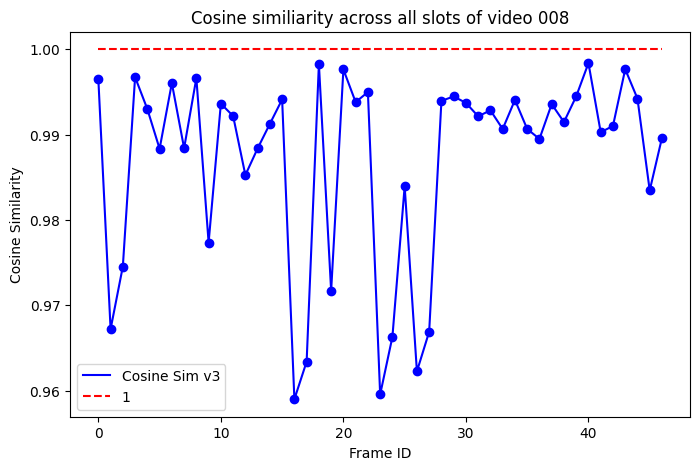

0.9870859
0.011367984


In [9]:
# overall cosine sim
indices = range(cos_sims.shape[0])

plt.figure(figsize=(8, 5))
plt.plot(indices, cos_sims, color='b', label="Cosine Sim v3")
plt.scatter(indices, cos_sims, color='b')
# plt.plot(indices, old_cos_sims, color='g', label="Cosine Sim v2")
# plt.scatter(indices, old_cos_sims, color='g')
plt.plot(indices, np.ones_like(cos_sims), color="r", linestyle="--", label="1")

if checkpoint_name == "memory_v3_custom":
    reset_mmb = cos_sims[np.where(reset_memory_bank)]
    plt.scatter(np.array(indices)[np.where(reset_memory_bank)], reset_mmb, color="red", marker="x", label="memory_bank_wipes")

plt.xlabel("Frame ID")
plt.ylabel("Cosine Similarity")
plt.legend(loc="best")
plt.title(f"Cosine similiarity across all slots of video {video_id}")
plt.show()

print(np.mean(cos_sims))
print(np.std(cos_sims))
# print(np.mean(old_cos_sims))
# print(np.std(old_cos_sims))

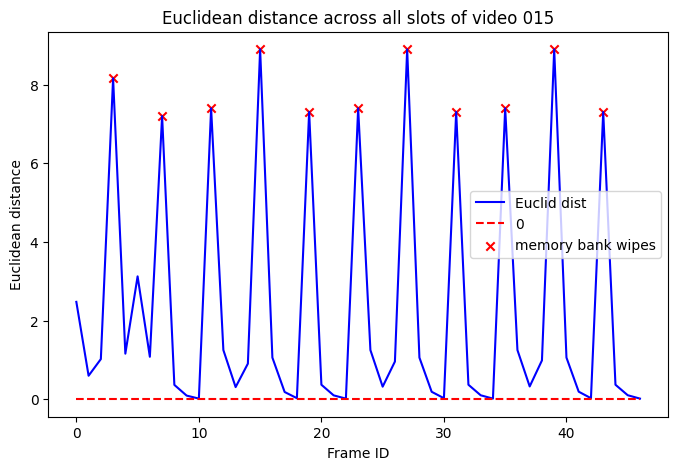

2.3174355
3.1265821


In [13]:
# overal euclidean distance
indices = range(eucl_sims.shape[0])

plt.figure(figsize=(8, 5))
plt.plot(indices, eucl_sims, color='b')
plt.plot(indices, np.zeros_like(eucl_sims), color="r", linestyle="--")

if checkpoint_name == "memory_v3_custom":
    reset_mmb = eucl_sims[np.where(reset_memory_bank)]
    plt.scatter(np.array(indices)[np.where(reset_memory_bank)], reset_mmb, color="red", marker="x")

plt.xlabel("Frame ID")
plt.ylabel("Euclidean distance")
plt.legend([f"Euclid dist", "0", "memory bank wipes"], loc="best")
plt.title(f"Euclidean distance across all slots of video {video_id}")
plt.show()

print(np.mean(eucl_sims))
print(np.std(eucl_sims))

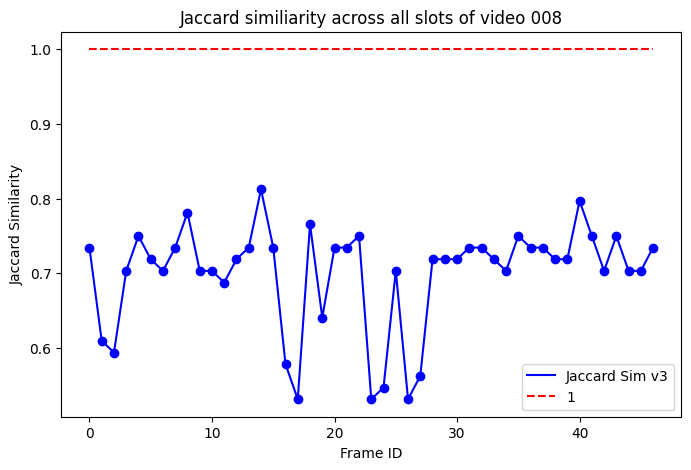

0.699468085106383
0.06952034309308312


In [10]:
# overall jaccard distance
indices = range(jac_sims.shape[0])

plt.figure(figsize=(8, 5))
plt.plot(indices, jac_sims, color='b', label="Jaccard Sim v3")
plt.scatter(indices, jac_sims, color='b')
# plt.plot(indices, old_jac_sims, color='g', label="Jaccard Sim v2")
# plt.scatter(indices, old_jac_sims, color='g')
plt.plot(indices, np.ones_like(jac_sims), color="r", linestyle="--", label=1)

if checkpoint_name == "memory_v3_custom":
    reset_mmb = jac_sims[np.where(reset_memory_bank)]
    plt.scatter(np.array(indices)[np.where(reset_memory_bank)], reset_mmb, color="red", marker="x", label="memory_bank_wipes")

plt.xlabel("Frame ID")
plt.ylabel("Jaccard Similarity")
plt.legend(loc="lower right")
plt.title(f"Jaccard similiarity across all slots of video {video_id}")
plt.show()

print(np.mean(jac_sims))
print(np.std(jac_sims))
# print(np.mean(old_jac_sims))
# print(np.std(old_jac_sims))

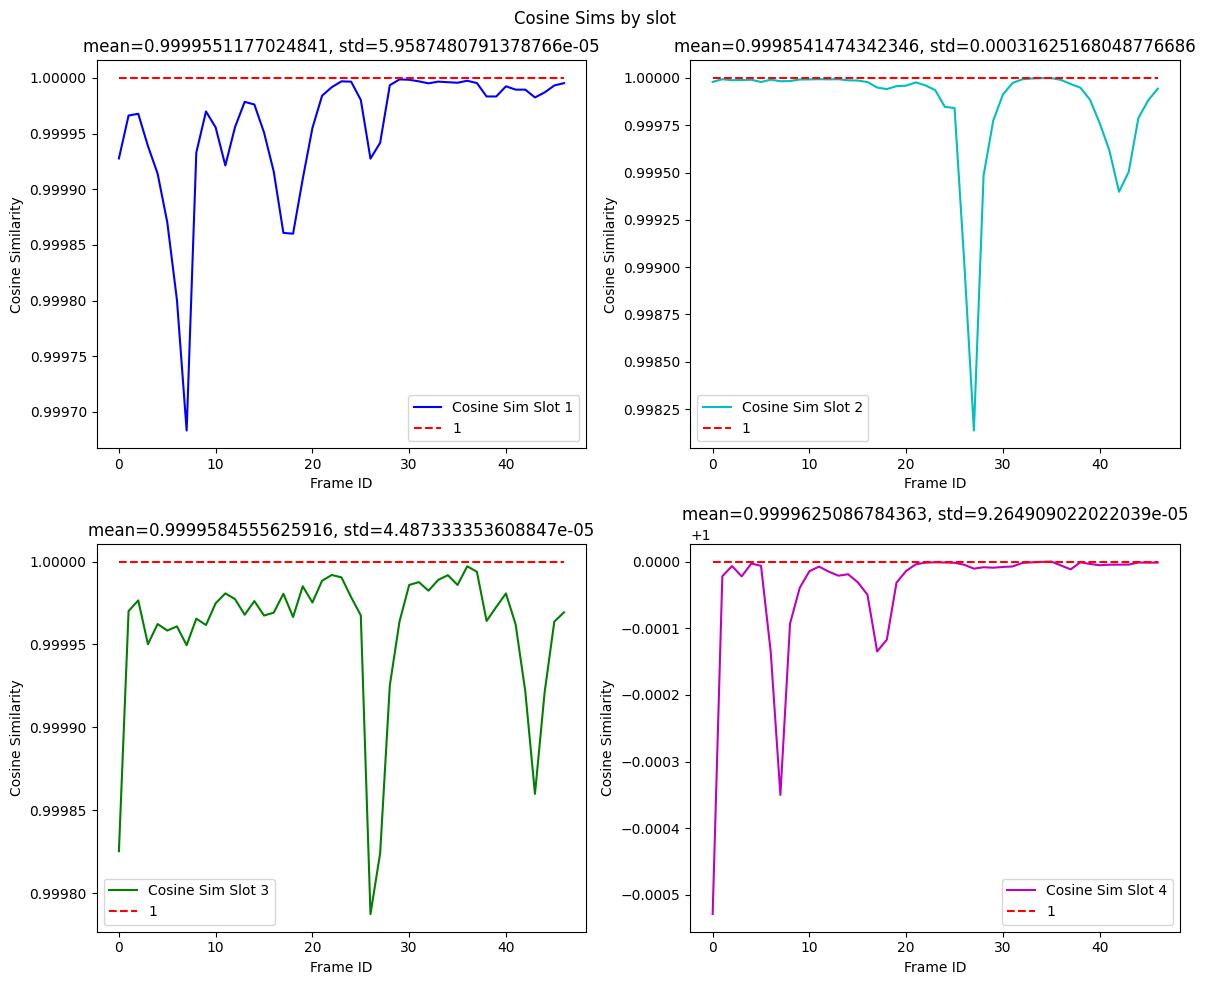

In [92]:
# cosine sims by slot
indices = range(slot_cos_sims[0].shape[0])
colors = ["b", "c", "g", "m"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    ax.plot(indices, slot_cos_sims[i], color=colors[i])
    ax.plot(indices, np.ones_like(slot_cos_sims[0]), color="r", linestyle="--")
    
    ax.set_xlabel("Frame ID")
    ax.set_ylabel(f"Cosine Similarity")
    ax.set_title(f"mean={np.mean(slot_cos_sims[i])}, std={np.std(slot_cos_sims[i])}")
    ax.legend([f"Cosine Sim Slot {i+1}", "1"], loc="best")

plt.suptitle(f"Cosine Sims by slot")
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.tight_layout()
plt.show()

In [ ]:
# euclidean distance by slot
indices = range(slot_eucl_sims[0].shape[0])
colors = ["b", "c", "g", "m"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    ax.plot(indices, slot_eucl_sims[i], color=colors[i])
    ax.plot(indices, np.zeros_like(slot_eucl_sims[0]), color="r", linestyle="--")
    
    ax.set_xlabel("Frame ID")
    ax.set_ylabel(f"Euclidean Distance")
    ax.set_title(f"mean={np.mean(slot_eucl_sims[i])}, std={np.std(slot_eucl_sims[i])}")
    ax.legend([f"Euclidean Distance Slot {i+1}", "0"], loc="upper center")

plt.suptitle(f"Euclidean distance by slot")
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.tight_layout()
plt.show()

: 

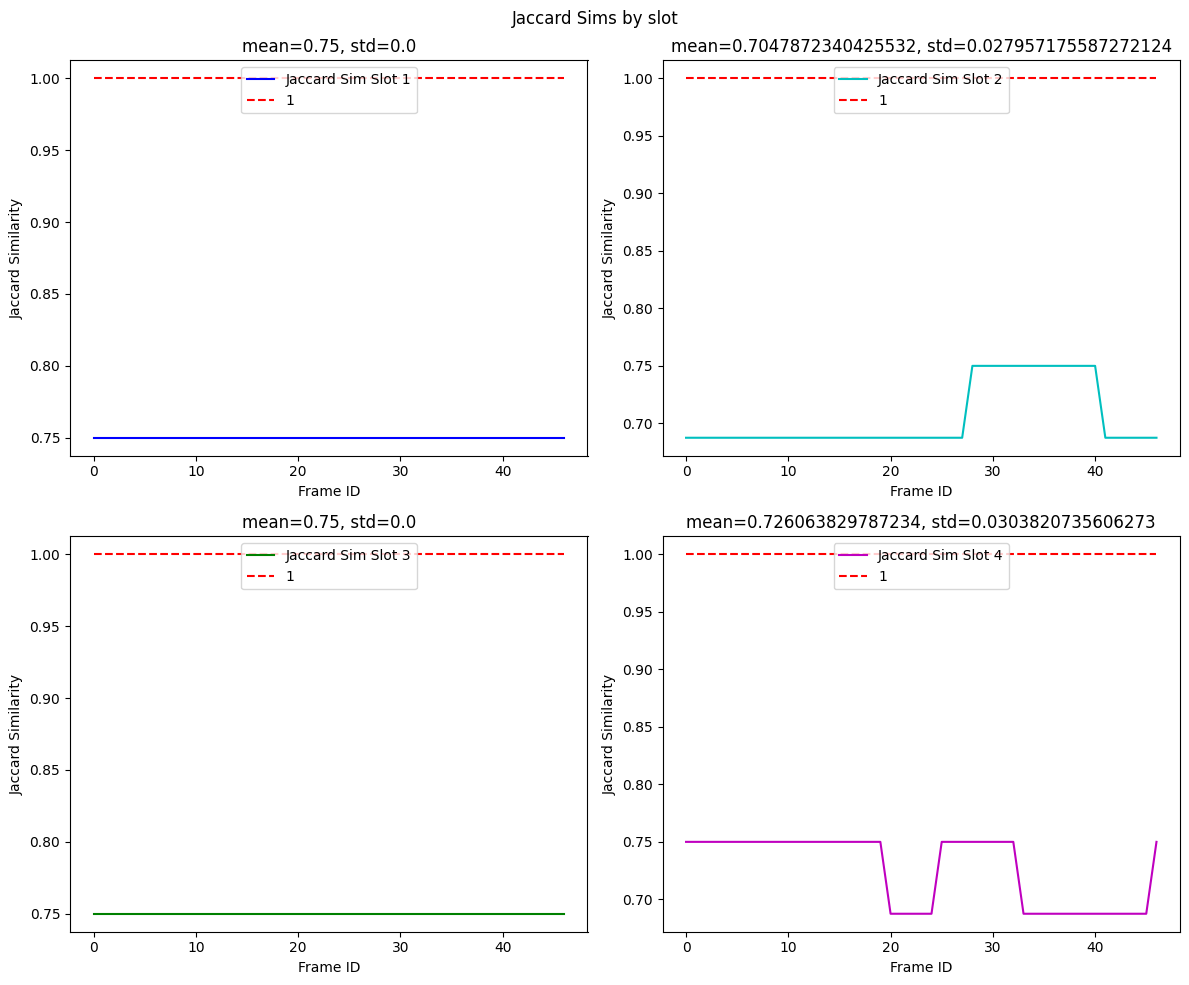

In [87]:
# jaccard sims by slot
indices = range(slot_jac_sims[0].shape[0])
colors = ["b", "c", "g", "m"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    ax.plot(indices, slot_jac_sims[i], color=colors[i])
    ax.plot(indices, np.ones_like(slot_jac_sims[0]), color="r", linestyle="--")
    
    ax.set_xlabel("Frame ID")
    ax.set_ylabel(f"Jaccard Similarity")
    ax.set_title(f"mean={np.mean(slot_jac_sims[i])}, std={np.std(slot_jac_sims[i])}")
    ax.legend([f"Jaccard Sim Slot {i+1}", "1"], loc="upper center")

plt.suptitle(f"Jaccard Sims by slot")
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.tight_layout()
plt.show()

## Plot sims for each slots

In [191]:
# slot_sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/slot_{sim_type}similarities_10000-10029.pkl"
slot_sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/slot_{sim_type}similarities_0-7.pkl"

with open(slot_sim_path, "rb") as f:
    slot_sims = pickle.load(f)

In [192]:
num_slots = 4

# cosine sim between consecutive images
slot_frame_sims = [[list() for _ in range(128)] for _ in range(num_slots)]
for video_id in sorted(slot_sims.keys()):
    for frame_id in sorted(slot_sims[video_id].keys()):
        for slot_id in sorted(slot_sims[video_id][frame_id].keys()):
            slot_frame_sims[slot_id][int(frame_id)].append(slot_sims[video_id][frame_id][slot_id])

valid_indices = [i for i in range(len(slot_frame_sims[0])) if len(slot_frame_sims[0][i]) > 0]

consec_slot_sim_means = np.array([np.mean(slot_frame_sims[s][i]) for s in range(num_slots) for i in valid_indices]).reshape(num_slots, len(valid_indices))
consec_slot_sim_std = np.array([np.std(slot_frame_sims[s][i]) for s in range(num_slots) for i in valid_indices]).reshape(num_slots, len(valid_indices))

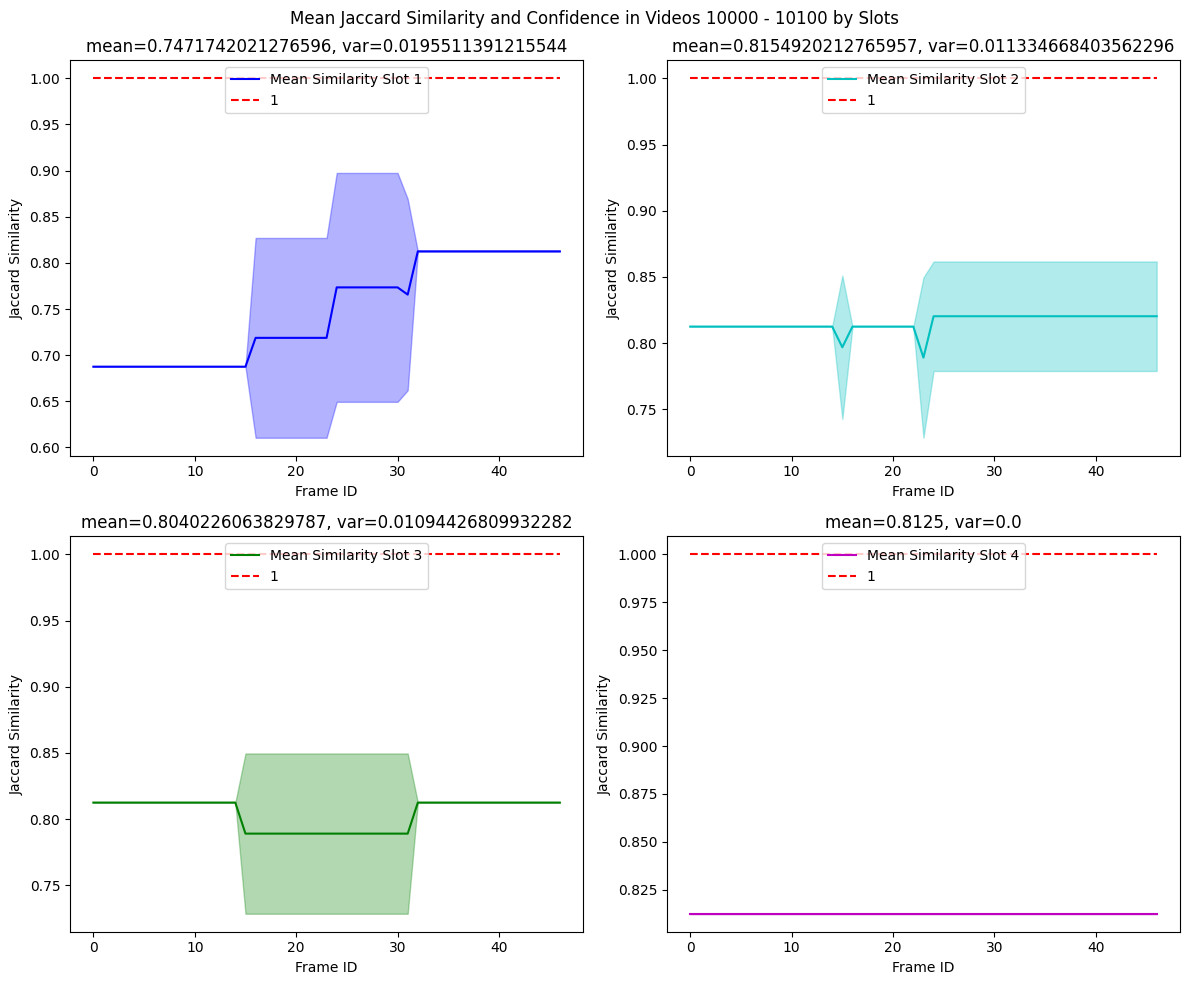

In [193]:
colors = ["b", "c", "g", "m"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    if i < num_slots:  # Ensure we don't go out of bounds
        ax.plot(valid_indices, consec_slot_sim_means[i], color=colors[i])
        ax.plot(valid_indices, np.ones_like(consec_slot_sim_means[0]), color="r", linestyle="--")
        
        # Optional: Confidence Interval
        ax.fill_between(
            valid_indices, 
            consec_slot_sim_means[i] + 2 * consec_slot_sim_std[i], 
            consec_slot_sim_means[i] - 2 * consec_slot_sim_std[i], 
            color=colors[i], 
            alpha=0.3
        )
        
        ax.set_xlabel("Frame ID")
        ax.set_ylabel(f"{sim_title} Similarity")
        ax.set_title(f"mean={np.mean(consec_slot_sim_means[i])}, var={np.mean(consec_slot_sim_std[i])}")
        ax.legend([f"Mean Similarity Slot {i+1}", "1"], loc="upper center")

plt.suptitle(f"Mean {sim_title} Similarity and Confidence in Videos 10000 - 10100 by Slots")
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.tight_layout()
plt.show()

In [ ]:
# mean cosine sim of all image pairs
for i in range(num_slots):
    print("Slot " + str(i))
    print(np.mean(consec_slot_sim_means[i]))
    print(np.mean(consec_slot_sim_std[i]))

Slot 0
0.9994598
0.00057411083
Slot 1
0.9991623
0.0011119983
Slot 2
0.9996793
0.00036615672
Slot 3
0.99952614
0.00067378103


: 

## Plot sim between image and mean encoding

In [ ]:
# sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/mean_{sim_type}similarities_10000-10099.pkl"
sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/mean_{sim_type}similarities_0-7.pkl"

with open(sim_path, "rb") as f:
    mean_sims = pickle.load(f)

: 

In [ ]:
# cosine sim between consecutive images
mean_frame_sims = [list() for _ in range(128)]
for video_id in sorted(mean_sims.keys()):
    for frame_id in sorted(mean_sims[video_id].keys()):
        mean_frame_sims[int(frame_id)].append(mean_sims[video_id][frame_id])

valid_indices = [i for i in range(len(mean_frame_sims)) if len(mean_frame_sims[i]) > 0]

mean_sim_means = np.array([np.mean(mean_frame_sims[i]) for i in valid_indices])
mean_sim_std = np.array([np.std(mean_frame_sims[i]) for i in valid_indices])

: 

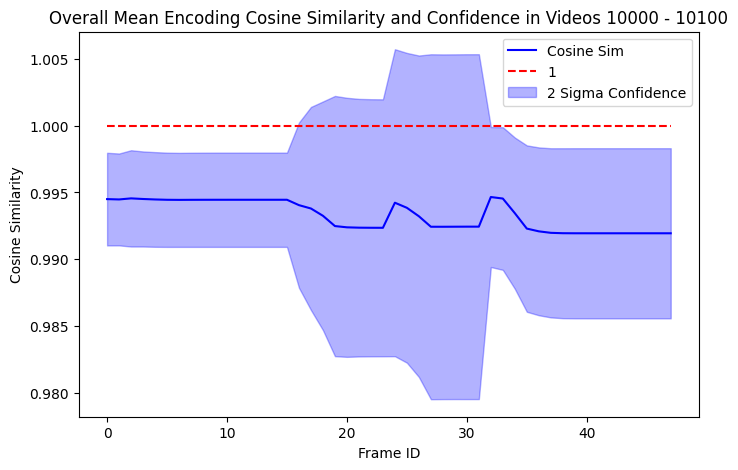

: 

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(valid_indices, mean_sim_means, color='b')
plt.plot(valid_indices, np.ones_like(mean_sim_means), color="r", linestyle="--")
plt.fill_between(valid_indices, mean_sim_means + 2 * mean_sim_std, mean_sim_means - 2 * mean_sim_std, color="b", alpha=0.3)

plt.xlabel("Frame ID")
plt.ylabel(f"{sim_title} Similarity")
plt.legend([f"{sim_title} Sim", "1", "2 Sigma Confidence"])
plt.title(f"Overall Mean Encoding {sim_title} Similarity and Confidence in Videos 10000 - 10100")
plt.show()

In [ ]:
# mean cosine sim of all image pairs
print(np.mean(mean_sim_means))
print(np.mean(mean_sim_std))

0.99326104
0.003384628


: 

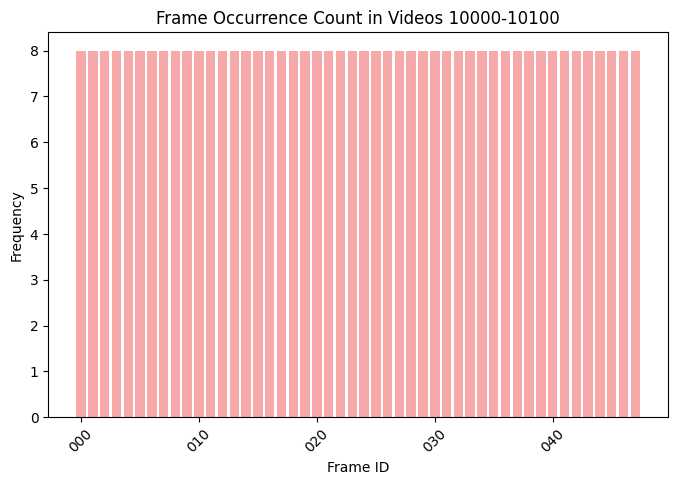

: 

In [ ]:
all_frames = [frame for frames in mean_sims.values() for frame in frames]

# Step 2: Count occurrences of each frame
frame_counts = Counter(all_frames)

# Step 3: Sort frames
sorted_frames = sorted(frame_counts.keys())  # Sort frame IDs alphabetically/numerically
sorted_counts = [frame_counts[frame] for frame in sorted_frames]  # Adjust values accordingly

# Step 4: Plot bar chart
plt.figure(figsize=(8, 5))
# plt.bar(sorted_frames, sorted_counts, color='#F7A8A8')
plt.bar(sorted_frames, sorted_counts, color='#F7A8A8')

plt.xlabel("Frame ID")
plt.ylabel("Frequency")
plt.title("Frame Occurrence Count in Videos 10000-10100")
n = 10  # Adjust this number to control density
plt.xticks(ticks=np.arange(0, len(sorted_frames), n), labels=sorted_frames[::n], rotation=45)
plt.show()

In [ ]:
# number of image pairs we got a similarity for
np.sum(sorted_counts)

384

: 

## Plot image similarity between video segments

In [12]:
checkpoint_name = "memory_v2_custom_complex_CLEVR"
sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/mean_segment_similarities_0-7.pkl"

with open(sim_path, "rb") as f:
    mean_segment_sims = pickle.load(f)

In [25]:
valid_indices = range(48)

mean_segment_frame_sims = [list() for _ in range(48)]
for video_id in sorted(mean_segment_sims.keys()):
    for frame_id in sorted(mean_segment_sims[video_id].keys()):
        mean_segment_frame_sims[int(frame_id)].append(mean_segment_sims[video_id][frame_id])

mean_sim_means = np.array([[np.mean(mean_segment_frame_sims[i][j]) for j in range(4)] for i in valid_indices])
mean_sim_std = np.array([[np.std(mean_segment_frame_sims[i][j]) for j in range(4)] for i in valid_indices])

mean_sim_std.shape

(48, 4)

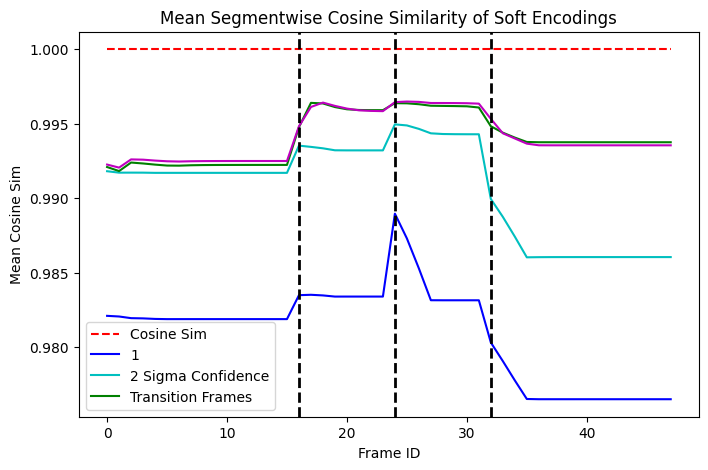

0.9899648
0.008506879


In [27]:
colors = ["b", "c", "g", "m"]

plt.figure(figsize=(8, 5))
plt.plot(valid_indices, np.ones_like(mean_sim_means[:, 0]), color="r", linestyle="--")
for i in range(4):
    plt.plot(valid_indices, mean_sim_means[:, i], color=colors[i])
    # plt.fill_between(valid_indices, mean_sim_means[:, i] + 2 * mean_sim_std[:, i], mean_sim_means[:, i] - 2 * mean_sim_std[:, i], color=colors[i], alpha=0.3)

plt.axvline(x=16, color='black', linestyle='--', linewidth=2, label="16")
plt.axvline(x=24, color='black', linestyle='--', linewidth=2, label="24")
plt.axvline(x=32, color='black', linestyle='--', linewidth=2, label="32")

plt.xlabel("Frame ID")
plt.ylabel(f"Mean Cosine Sim")
plt.legend(["Cosine Sim", "1", "2 Sigma Confidence", "Transition Frames"])
plt.title(f"Mean Segmentwise Cosine Similarity of Soft Encodings")
plt.show()

# mean cosine sim of all image pairs
print(np.mean(mean_sim_means))
print(np.mean(mean_sim_std))

## Plot individual videos

In [ ]:
num_slots = 4
key = sorted(sims.keys())[5]
valid_indices = sorted(sims[key].keys())
current_video_sims = np.array([sims[key][f_id] for f_id in valid_indices])
current_slot_sims = np.array([[slot_sims[key][f_id][s] for f_id in valid_indices] for s in range(num_slots)])

: 

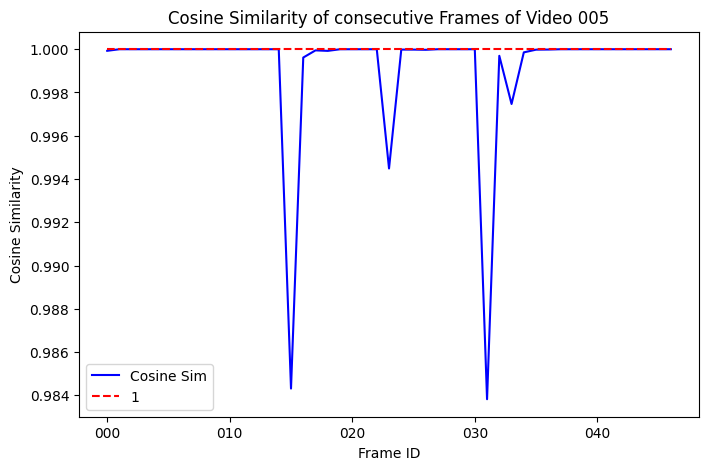

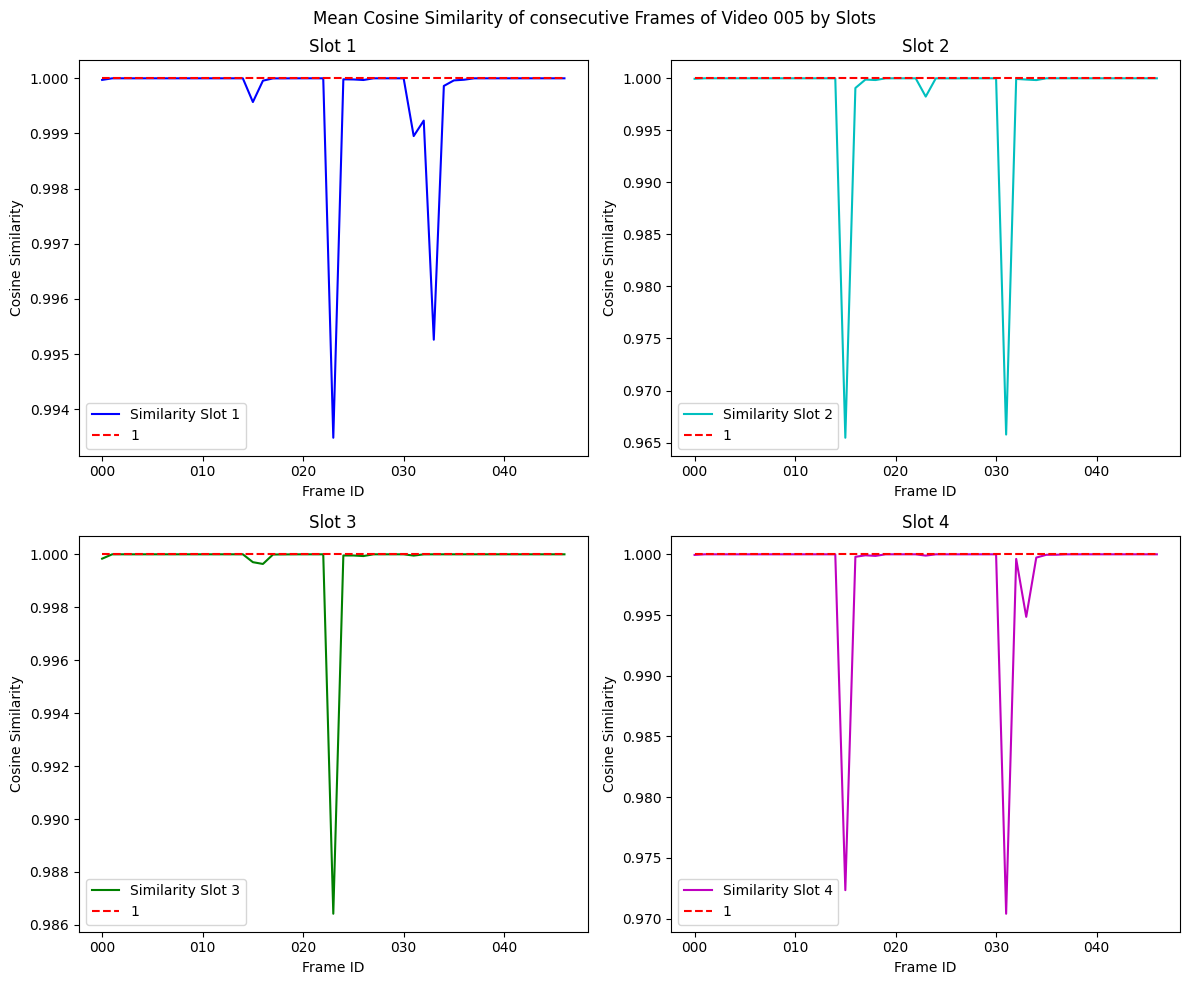

: 

In [ ]:
n = 10

plt.figure(figsize=(8, 5))
plt.plot(valid_indices, current_video_sims, color='b')
plt.plot(valid_indices, np.ones_like(current_video_sims), color="r", linestyle="--")
# plt.fill_between(valid_indices, consec_sim_means + 2 * consec_sim_std, consec_sim_means - 2 * consec_sim_std, color="b", alpha=0.3)
plt.xticks(ticks=np.arange(0, len(valid_indices), n), labels=valid_indices[::n])
plt.xlabel("Frame ID")
plt.ylabel("Cosine Similarity")
plt.legend(["Cosine Sim", "1"])
plt.title(f"Cosine Similarity of consecutive Frames of Video {key}")
plt.show()

colors = ["b", "c", "g", "m"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    if i < num_slots:  # Ensure we don't go out of bounds
        ax.plot(valid_indices, current_slot_sims[i], color=colors[i])
        ax.plot(valid_indices, np.ones_like(current_slot_sims[0]), color="r", linestyle="--")
        ax.set_xticks(ticks=np.arange(0, len(valid_indices), n), labels=valid_indices[::n])
        ax.set_xlabel("Frame ID")
        ax.set_ylabel("Cosine Similarity")
        ax.set_title(f"Slot {i+1}")
        ax.legend([f"Similarity Slot {i+1}", "1"])

plt.suptitle(f"Mean Cosine Similarity of consecutive Frames of Video {key} by Slots")
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.tight_layout()
plt.show()

## Plot soft segment means against encodings

In [ ]:
import pickle
import numpy as np


def cosine_similarity(arr1: np.ndarray, arr2: np.ndarray):
    arr1 = arr1.flatten()
    arr2 = arr2.flatten()
    return np.dot(arr1, arr2) / (np.linalg.norm(arr1) * np.linalg.norm(arr2))

def get_frame_segment_index(video_frame_segment_indices, image_index):
    image_index = int(image_index)
    for i, segment in enumerate(video_frame_segment_indices):
        if image_index in segment:
            return i
    return len(video_frame_segment_indices) # should cause an Index Error later

def main(hard_encoding_filepath, soft_encoding_filepath):

    with open(hard_encoding_filepath, "rb") as f:
        hard_encodings = pickle.load(f)
    with open(soft_encoding_filepath, "rb") as f:
        soft_encodings = pickle.load(f)

    video_shift_frame_index = [0, 16, 24, 32, 48]
    video_frame_segment_indices = [range(video_shift_frame_index[i], video_shift_frame_index[i+1]) for i in range(len(video_shift_frame_index) - 1)]
    
    # compute sim to mean representation
    mean_sim_dict = np.zeros((8, 48, 4))
    for video_id in soft_encodings.keys():
        # mean_sim_dict[video_id] = dict()
        # mean_video_encoding = np.mean([soft_code.flatten() for soft_code in soft_encodings[video_id].values()], axis=0)
        mean_video_encodings = [np.mean([soft_code.flatten() for frame_id, soft_code in soft_encodings[video_id].items() if int(frame_id) in segment_indices], axis=0) for segment_indices in video_frame_segment_indices]

        for frame_id in soft_encodings[video_id].keys():
            # segment_index = get_frame_segment_index(video_frame_segment_indices, frame_id)
            # sim = cosine_similarity(soft_encodings[video_id][frame_id], mean_video_encodings[segment_index])
            sim = [cosine_similarity(soft_encodings[video_id][frame_id], mve) for mve in mean_video_encodings]
            mean_sim_dict[int(video_id), int(frame_id)] = sim

    # save dict
    # with open(f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/mean_segment_similarities_{min_video}-{max_video}.pkl", "wb") as f:
    # # with open(f"/app/ncb/encoding_comparison_scripts/results/default/similarities_{min_video}-{max_video}.pkl", "wb") as f:
    #     pickle.dump(mean_sim_dict, f)

    return mean_sim_dict


# min_video, max_video = 10000, 10099
# min_video, max_video = 10000, 10000
min_video, max_video = 0, 7
# checkpoint_name = "finetuning_0.1_0.8"
# checkpoint_name = "SAM"
checkpoint_name = "default_custom_complex_CLEVR"
hard_encoding_filepath = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/val_hard_encodings_{min_video}-{max_video}.pkl"
soft_encoding_filepath = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/val_soft_encodings_{min_video}-{max_video}.pkl"
sim_array = main(hard_encoding_filepath, soft_encoding_filepath)


In [22]:
mean_sim_array = np.mean(sim_array, axis=0)
mean_sim_array.shape

(48, 4)

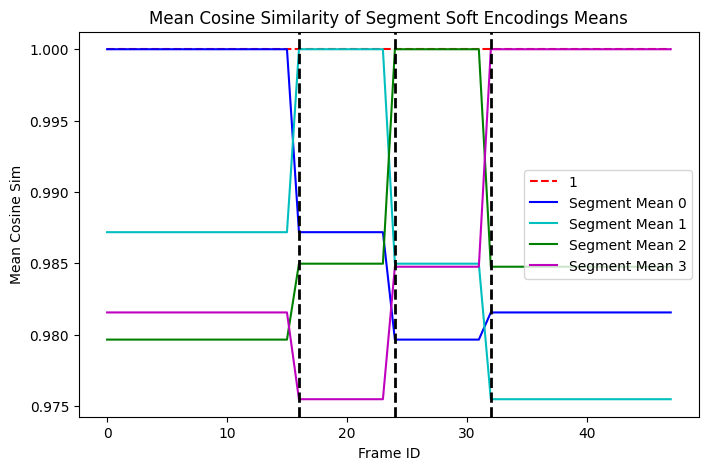

In [23]:
colors = ["b", "c", "g", "m"]

plt.figure(figsize=(8, 5))
plt.plot(np.ones_like(mean_sim_array[:, 0]), color="r", linestyle="--", label=1)
for i in range(4):
    plt.plot(mean_sim_array[:, i], color=colors[i], label=f"Segment Mean {i}")

plt.axvline(x=16, color='black', linestyle='--', linewidth=2)
plt.axvline(x=24, color='black', linestyle='--', linewidth=2)
plt.axvline(x=32, color='black', linestyle='--', linewidth=2)

plt.legend()
plt.xlabel("Frame ID")
plt.ylabel(f"Mean Cosine Sim")
plt.title(f"Mean Cosine Similarity of Segment Soft Encodings Means")
plt.show()

## Plot hard segment mean against encodings

In [34]:
import pickle
import numpy as np
from scipy.stats import mode


def jaccard_similarity(arr1: np.ndarray, arr2: np.ndarray):
    arr1 = arr1.flatten()
    arr2 = arr2.flatten()
    return np.sum(arr1 == arr2) / arr1.size


def main(hard_encoding_filepath, soft_encoding_filepath):

    with open(hard_encoding_filepath, "rb") as f:
        hard_encodings = pickle.load(f)
    with open(soft_encoding_filepath, "rb") as f:
        soft_encodings = pickle.load(f)

    video_shift_frame_index = [0, 16, 24, 32, 48]
    video_frame_segment_indices = [range(video_shift_frame_index[i], video_shift_frame_index[i+1]) for i in range(len(video_shift_frame_index) - 1)]
    
    # compute sim to mean representation
    mean_sim_dict = np.zeros((8, 48, 4))
    for video_id in hard_encodings.keys():
        # mean_sim_dict[video_id] = dict()
        # mean_video_encoding = np.mean([soft_code.flatten() for soft_code in soft_encodings[video_id].values()], axis=0)
        mean_video_encodings = [mode([hard_code.flatten() for frame_id, hard_code in hard_encodings[video_id].items() if int(frame_id) in segment_indices], axis=0)[0] for segment_indices in video_frame_segment_indices]

        for frame_id in hard_encodings[video_id].keys():
            # segment_index = get_frame_segment_index(video_frame_segment_indices, frame_id)
            # sim = cosine_similarity(soft_encodings[video_id][frame_id], mean_video_encodings[segment_index])
            sim = [jaccard_similarity(hard_encodings[video_id][frame_id], mve) for mve in mean_video_encodings]
            mean_sim_dict[int(video_id), int(frame_id)] = sim

    # save dict
    # with open(f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/mean_segment_similarities_{min_video}-{max_video}.pkl", "wb") as f:
    # # with open(f"/app/ncb/encoding_comparison_scripts/results/default/similarities_{min_video}-{max_video}.pkl", "wb") as f:
    #     pickle.dump(mean_sim_dict, f)

    return mean_sim_dict


# min_video, max_video = 10000, 10099
# min_video, max_video = 10000, 10000
min_video, max_video = 0, 7
# checkpoint_name = "finetuning_0.1_0.8"
# checkpoint_name = "SAM"
checkpoint_name = "default_custom_complex"
hard_encoding_filepath = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/val_hard_encodings_{min_video}-{max_video}.pkl"
soft_encoding_filepath = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/val_soft_encodings_{min_video}-{max_video}.pkl"
sim_array = main(hard_encoding_filepath, soft_encoding_filepath)


In [35]:
mean_sim_array = np.mean(sim_array, axis=0)
mean_sim_array.shape

(48, 4)

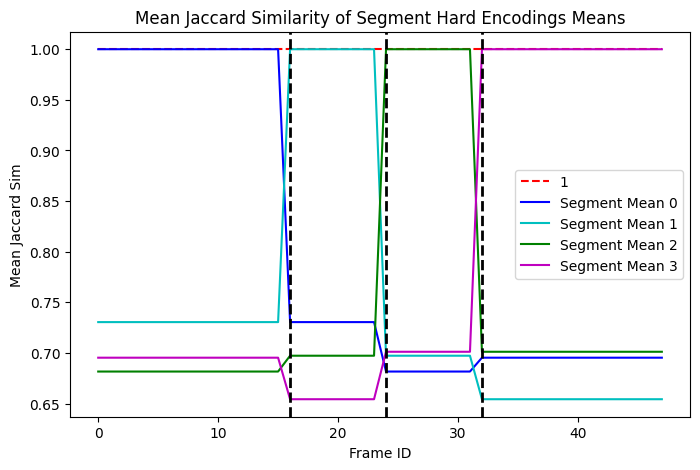

In [36]:
colors = ["b", "c", "g", "m"]

plt.figure(figsize=(8, 5))
plt.plot(np.ones_like(mean_sim_array[:, 0]), color="r", linestyle="--", label=1)
for i in range(4):
    plt.plot(mean_sim_array[:, i], color=colors[i], label=f"Segment Mean {i}")

plt.axvline(x=16, color='black', linestyle='--', linewidth=2)
plt.axvline(x=24, color='black', linestyle='--', linewidth=2)
plt.axvline(x=32, color='black', linestyle='--', linewidth=2)

plt.legend()
plt.xlabel("Frame ID")
plt.ylabel(f"Mean Jaccard Sim")
plt.title(f"Mean Jaccard Similarity of Segment Hard Encodings Means")
plt.show()